In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# netCDF4 needs to be installed in your environment for this to work
import xarray as xr
import rioxarray as rxr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import geopandas as gpd
import earthpy as et

# Plotting options
sns.set(font_scale=1.3)
sns.set_style("white")


In [3]:
path = "D:\download.nc"
temp_xr = xr.open_dataset(path)
skt = temp_xr['skt'] #Skin Temperature data loaded into array

In [4]:
skt.shape 

(3476, 1801, 3600)

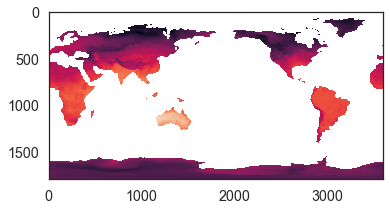

In [5]:
plt.imshow(skt[1])
plt.show()
# get the longitude information
#lons = nc.variables['longitude'][:]
# get the latitude information
#lats = nc.variables['latitude'][:]


In [6]:
#import ee
#import geemap

#optional
#Map = geemap.Map(center=(40, -100), zoom=4)
#Map

longitude = 79
latitude = 18
#default values are 79.0968, 18.2294

## One point Analysis of the skin temperature data

In [7]:
temp_single_point = skt.sel(latitude=latitude,longitude=longitude)

temp_single_point

<xarray.DataArray 'skt' (time: 3476)>
array([288.13602, 304.9049 , 301.8567 , ..., 319.97244, 315.23755, 304.14224],
      dtype=float32)
Coordinates:
    longitude  float32 79.0
    latitude   float32 18.0
  * time       (time) datetime64[ns] 1950-01-15 ... 2022-05-15T18:00:00
Attributes:
    units:      K
    long_name:  Skin temperature

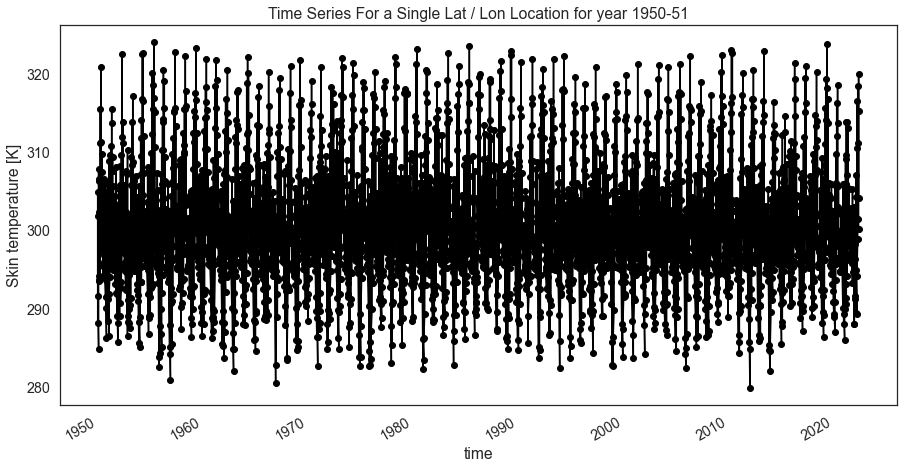

In [8]:
f, ax = plt.subplots(figsize=(15, 7))
temp_single_point.plot.line(hue='lat',marker="o",ax=ax,color="black")
ax.set(title="Time Series For a Single Lat / Lon Location for year 1950-51")

# Uncomment the line below if you wish to export the figure as a .png file
# plt.savefig("single_point_timeseries.png")
plt.show()

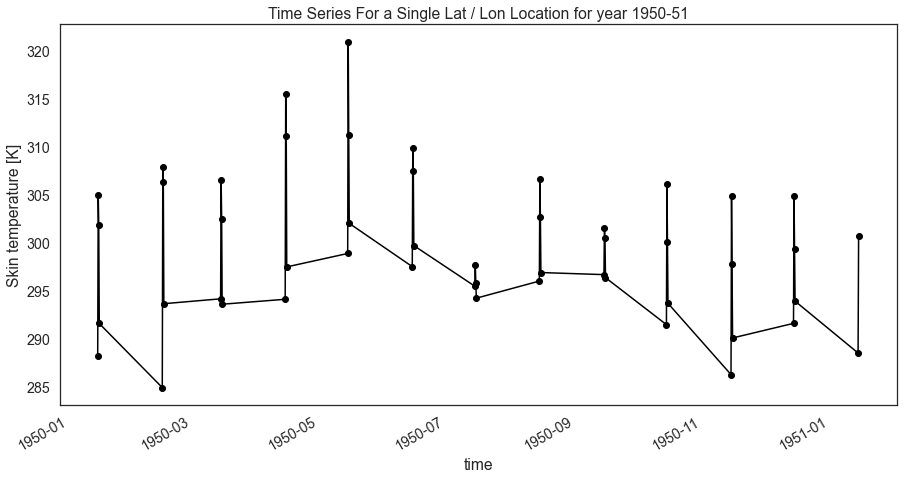

In [9]:
f, ax = plt.subplots(figsize=(15, 7))

temp_single_point[0:50].plot.line(hue='lat',marker="o",ax=ax,color="black")
ax.set(title="Time Series For a Single Lat / Lon Location for year 1950-51")
plt.show()

In [10]:
temp_single_point

<xarray.DataArray 'skt' (time: 3476)>
array([288.13602, 304.9049 , 301.8567 , ..., 319.97244, 315.23755, 304.14224],
      dtype=float32)
Coordinates:
    longitude  float32 79.0
    latitude   float32 18.0
  * time       (time) datetime64[ns] 1950-01-15 ... 2022-05-15T18:00:00
Attributes:
    units:      K
    long_name:  Skin temperature

In [11]:
singlepoint_max_val = temp_single_point.groupby('time.year').max(skipna=True)
singlepoint_min_val = temp_single_point.groupby('time.year').min(skipna=True)
mean_single_point = temp_single_point.groupby('time.year').mean()

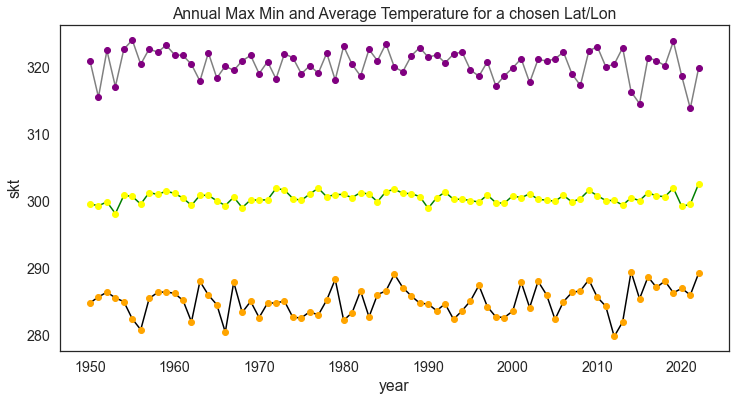

In [12]:
# Plot the data
f, ax = plt.subplots(figsize=(12, 6))
singlepoint_max_val.plot.line(hue='lat',marker="o",ax=ax,color="grey",markerfacecolor="purple",markeredgecolor="purple")
singlepoint_min_val.plot.line(hue='lat',marker="o",ax=ax,color="black",markerfacecolor="orange",markeredgecolor="orange")
mean_single_point.plot.line(hue='lat',marker="o",ax=ax,color="green",markerfacecolor="yellow",markeredgecolor="yellow")
ax.set(title="Annual Max Min and Average Temperature for a chosen Lat/Lon")
plt.show()

In [13]:
mean_single_point

<xarray.DataArray 'skt' (year: 73)>
array([299.5983 , 299.34247, 299.913  , 298.17203, 300.8805 , 300.74603,
       299.5819 , 301.31482, 301.02652, 301.5187 , 301.19098, 300.4844 ,
       299.39908, 300.90146, 300.89505, 300.07755, 299.37296, 300.6229 ,
       299.05652, 300.22604, 300.1753 , 300.2362 , 301.91916, 301.70468,
       300.4109 , 300.14557, 301.1022 , 301.96735, 300.6722 , 301.01578,
       301.03018, 300.55435, 301.31644, 301.06985, 299.94293, 301.4522 ,
       301.79004, 301.2206 , 301.1411 , 300.718  , 298.96994, 300.53394,
       301.38046, 300.29965, 300.31668, 300.11343, 299.89868, 300.95703,
       299.79337, 299.7262 , 300.8304 , 300.5337 , 301.13367, 300.29807,
       300.17734, 300.0117 , 300.9007 , 299.90744, 300.40884, 301.64456,
       300.84525, 300.125  , 300.12677, 299.44504, 300.52304, 300.10925,
       301.2914 , 300.81046, 300.6965 , 301.9752 , 299.23022, 299.57962,
       302.63742], dtype=float32)
Coordinates:
    longitude  float32 79.0
    latitude   float32 18.0
  * year       (year) int64 1950 1951 1952 1953 1954 ... 2019 2020 2021 2022

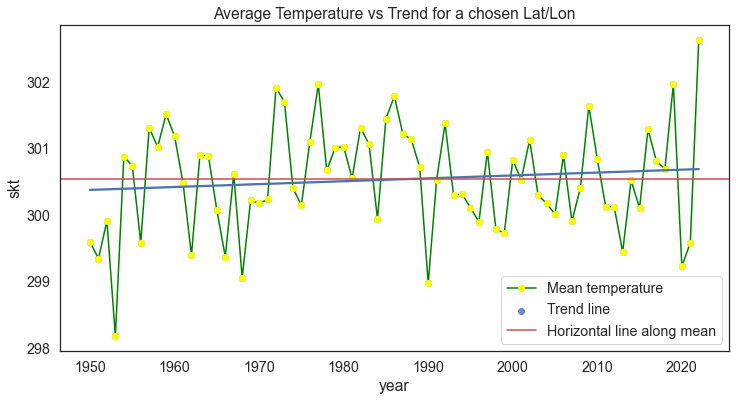

In [14]:
f, ax = plt.subplots(figsize=(12, 6))
import seaborn as sns

mean_single_point.plot.line(hue='lat',marker="o",ax=ax,color="green",markerfacecolor="yellow",markeredgecolor="yellow",label ='Mean temperature')
sns.regplot(x = "year",y = mean_single_point, ci = None,data = mean_single_point,label ='Trend line')
plt.axhline(y = mean_single_point.mean(), color = 'r', linestyle = '-',label ='Horizontal line along mean')

plt.legend()
ax.set(title="Average Temperature vs Trend for a chosen Lat/Lon")
plt.show()
#plt.savefig('AverageTempMAforaSinglepoint.png')

In [15]:
#Get mean yearly temperatures for the data.
skt_yearly_mean = skt.groupby('time.year').mean()

In [1]:
#skt_yearly_mean.to_netcdf(path= "D:\yearlymean.nc")

In [ ]:
skt_yearly_mean.shape

In [ ]:
#get mean temperature data
final_skt_data = skt_yearly_mean.mean(dim = ["year"])

In [ ]:
final_skt_data.shape

In [ ]:
final_skt_data.to_netcdf(path= "D:\output.nc")

In [ ]:
plt.imshow(final_skt_data)
plt.show()
# get the longitude information
lons = nc.variables['longitude'][:]
# get the latitude information
lats = nc.variables['latitude'][:]
# calculate the cellsize
cellsize = lons[:][1] - lons[:][0]

### Now we have the average temperature data and yearly average temperature data. We can begin our anomaly analysis with these and find out further what this data means and use it for other purposes. 